# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

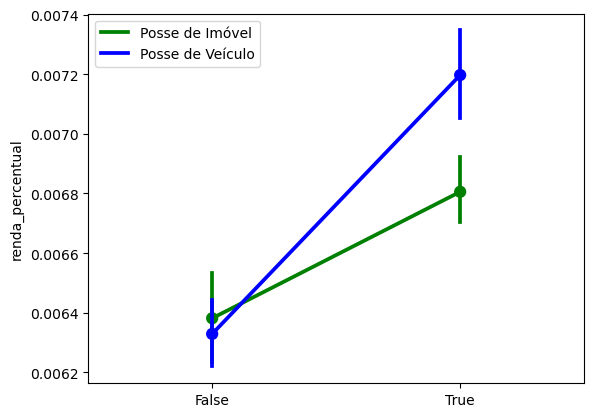

In [1]:
# Atualmente, este é meu bloco fixo de importações
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests as rq
from scipy import stats # encontrei essa biblioteca para estatisticas, a qual achei interessante durante meus estudos
%matplotlib inline

# Carregando o arquivo diretamente em um df
base_original = pd.read_csv("Base_m10.csv")

# Superficialmente, farei primeiro a análise de perfís das médias na base original de dados
base_original["renda_percentual"] = (base_original["renda"] / (base_original["renda"].sum())) * 100

ax = sns.pointplot(x="posse_de_imovel", y="renda_percentual", data=base_original, dodge=True, ci = 90, color="green")
ax = sns.pointplot(x="posse_de_veiculo", y="renda_percentual", data=base_original, dodge=True, ci = 90, color="blue")
ax.set(xlabel=None)

# Adicionar legenda no canto, atribuindo cada nome a uma curva
legenda = ["Posse de Imóvel", "Posse de Veículo"]
ax.legend(handles=ax.lines[::len(base_original["posse_de_veiculo"].unique()) + 1], labels=legenda, loc="upper left")

plt.show()

O gráfico mostra que as médias das duas variáveis são semelhantes para clientes sem as posses, mas a renda percentual muda quando o cliente possui uma das posses.

In [2]:
# Aprofundando a análise estatística
# Criando bases separadas para análise estatística
base_posse_imovel = base_original[base_original["posse_de_imovel"] == True]
base_sem_imovel = base_original[base_original["posse_de_imovel"] == False]
base_posse_veiculo = base_original[base_original["posse_de_veiculo"] == True]
base_sem_veiculo = base_original[base_original["posse_de_veiculo"] == False]

# Separando as rendas entre "com" e "sem" as variáveis
renda_posse_veiculo = base_posse_veiculo["renda"]
renda_sem_veiculo = base_sem_veiculo["renda"]
renda_posse_imovel = base_posse_imovel["renda"]
renda_sem_imovel = base_sem_imovel["renda"]

# Aplicando teste estatístico para verificar se elas discriminam a variável-alvo
t_stat_veiculo, p_valor_veiculo = stats.ttest_ind(renda_posse_veiculo, renda_sem_veiculo)
t_stat_imovel, p_valor_imovel = stats.ttest_ind(renda_posse_imovel, renda_sem_imovel)

# Selecionando a confiabilidade da análise de dados para alpha=1%
significancia = 0.01

# Se o valor-p for menor que o limite, então temos evidências contra a hipótese-nula de médias populacionais iguais.
if p_valor_imovel < significancia:
    print("A variável 'posse_de_imóvel' (p_i= {:.4f}) é uma preditora significativa da renda, para I.C. de 99%.".format(p_valor_imovel))
else:
    print("A variável 'posse_de_imóvel' (p_i > 1%) não é uma preditora significativa da renda, para I.C. de 99%.")

if p_valor_veiculo < significancia:
    print("A variável 'posse_de_veículo' (p_v= {:.16f}) é uma preditora significativa da renda, para I.C. de 99%.".format(p_valor_veiculo))
else:
    print("A variável 'posse_de_veículo' (p_v > 1%) não é uma preditora significativa da renda, para I.C. de 99%.")

A variável 'posse_de_imóvel' (p_i= 0.0003) é uma preditora significativa da renda, para I.C. de 99%.
A variável 'posse_de_veículo' (p_v= 0.0000000000000076) é uma preditora significativa da renda, para I.C. de 99%.
